# Loss and Optimizer

In [1]:
import torch
import torch.utils
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST(
    root='',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

test = datasets.MNIST(
    root='',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

trainset = torch.utils.data.DataLoader(
    train,
    batch_size=16,
    shuffle=True
)

testset = torch.utils.data.DataLoader(
    test,
    batch_size=16,
    shuffle=True
)

In [2]:
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # all neurons have the same active function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1) 
        # dim here is more likely to be axis= in pandas, it makes sure our y is distribution across numbers instead of batched
        return x

In [3]:
X = torch.rand([28, 28])
X = X.view([-1, 28 * 28])
net = Net()
output = net(X)
output

tensor([[-2.2091, -2.2421, -2.1911, -2.3542, -2.3493, -2.2295, -2.4042, -2.3938,
         -2.2886, -2.3952]], grad_fn=<LogSoftmaxBackward0>)

## Loss
measure of how wrong is the model

our goal is to keep decreasing the loss

## Optimizer
its job is to go through the computation and adjust the weights based on loss(gradient)

learning rate: the time we used in lowring the loss is based on learning rate

In [4]:
import torch.optim as optim

optimizer = optim.Adam(
    net.parameters(), # all adjustable params in model
    lr=1e-3 # 0.001
    )

- consider transfer learning
the first layers in the net may be good at small and general types of image recognition tasks

the later layers may be good at exact tasks you designed

in this case, you need to freeze the first layers

- learning rate

learning rate is to avoid overfitting, we dont want loss to be 0, so we control the size

we want go batches and batched but only capture the principle features

- no perfect lr

thats what we call delaying lr

# Loss in trainning process
we compute the loss, and adjust weights based on it.

our expectation is the loss will be lower, and accuracy follows.

high accuracy is not our task for model.

# Epochs
we want to go through our full data for several times.

one time is called epoch

In [6]:
epoch_num = 3

for epoch in range(epoch_num):
    for data in trainset:
        X, y = data
        net.zero_grad() # every time before input numbers into network
        # if you dont 0 the gradient, they will add together
        # you can view the gradient as a container which contains the loss
        # then the optimizer go through and use these gradients to optimize the weights
        output = net(X.view([-1, 28 * 28]))
        # how wrong are we!
        loss = F.nll_loss(output, y) # loss metric function
        loss.backward() # pytorch magic!
        optimizer.step() # in each step, update parans one time

    print(f'{epoch}: {loss}')


# note that batch data has 2 advantages
# 1. it decreased training time
# 2, suitable for weak GPU

0: 0.08076558262109756
1: 0.0705980584025383
2: 0.0006412824732251465


# Model Evaluation

In [7]:
correct = 0
total = 0

with torch.no_grad():
    # under frozen environment, lets do somethings
    # especially validating something

    # net.train(), net.eval(), these are modes
    for data in trainset:
        X, y = data
        output = net(X.view([-1, 28 * 28])) # remember to flatten

        for idx, i in enumerate(output): # why? what is output? why enumerate
            if torch.argmax(i) == y[idx]:
                correct += 1

            total += 1

print(f'Accuracy: {correct / total}')

Accuracy: 0.97345


In [8]:
# check last batch data 16 Xs
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

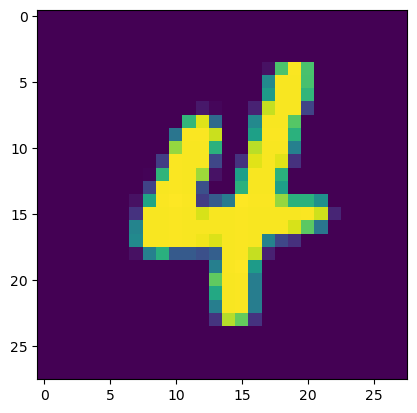

In [20]:
from matplotlib import pyplot as plt

plt.imshow(X[3].view([28, 28]))
plt.show()

In [21]:
# check our net result
torch.argmax(
    net(X[3].view([-1, 28 * 28]))[0] # torch.argmax return list, here is scale case
)

tensor(4)